# Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Checking DataFrame

In [68]:
df = pd.read_csv('ds_salaries.csv')
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [69]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [71]:
df.duplicated().sum()

0

In [72]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [73]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [74]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

There are too many job titles are are similar to one another. This can become an issue when trying to interpret results in further vizualisation. Therefore, we will be using ML model to cluster the data in categories that are similar to one another.

In [75]:
# Convert job titles to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['job_title'])

# Apply K-means clustering with 7 clusters
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to job titles
df['cluster_label'] = kmeans.labels_

# Rename the column
df.rename(columns={'job_title': 'Original Job Title'}, inplace=True)

# Define the new cluster names
cluster_job_titles = {
    0: 'Data Engineer',
    1: 'Data Scientist',
    2: 'Data Analyst',
    3: 'Data Head or Director',
    4: 'Machine Learning',
    5: 'Data Lead',
    6: 'Researcher',
    7: 'Other'
}

# Map the cluster labels to the new cluster names
df['cluster_job_title'] = df['cluster_label'].map(cluster_job_titles)

# Print the renamed clustered job titles
for cluster_label in range(n_clusters):
    cluster_jobs = df[df['cluster_label'] == cluster_label]['Original Job Title'].tolist()
    cluster_job_title = cluster_job_titles[cluster_label]
    print(f"Cluster {cluster_label + 1} ({cluster_job_title}): {cluster_jobs}")


Cluster 1 (Data Engineer): ['Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Da

In [76]:
df.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,Original Job Title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,cluster_label,cluster_job_title
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1,Data Scientist
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,4,Machine Learning
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,5,Data Lead


# EDA Analysis

### Histograms

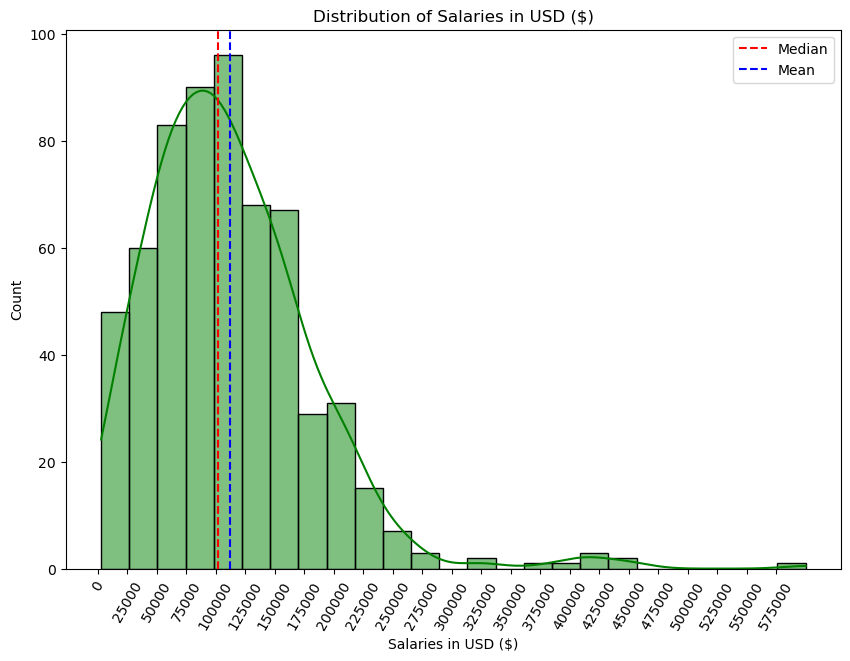

In [77]:
# Histograme distrinution of salary in USD
plt.figure(figsize=(10,7))
sns.histplot(df['salary_in_usd'], bins=25, color='Green', kde=True)
plt.xlabel('Salaries in USD ($)')
plt.xticks(range(0, df['salary_in_usd'].max(), 25000))
plt.xticks(rotation=60)
plt.title('Distribution of Salaries in USD ($)')

#Adding median line
median = np.median(df['salary_in_usd'])
mean = np.mean(df['salary_in_usd'])
plt.axvline(median, color='red', linestyle='--', label='Median')
plt.axvline(mean, color='blue', linestyle='--', label='Mean')
plt.legend()

### Bar Chart

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

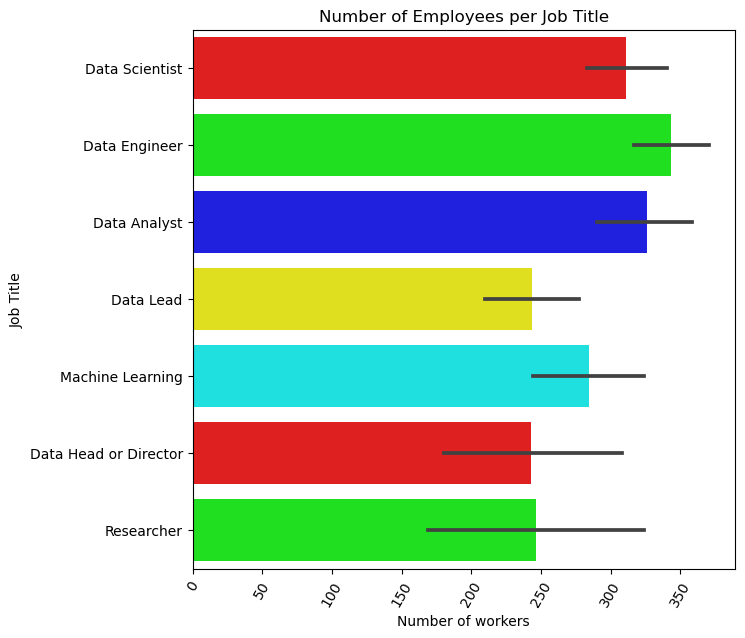

In [136]:
# Bar chart with the employment type
# Use clustering to show the plot
plt.figure(figsize=(7,7))
custom_palette = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"]
order = df.groupby('cluster_job_title').size().sort_values(ascending=False).index
ax = sns.barplot(x=df.index.values, y=df['cluster_job_title'], data=df, palette=custom_palette, order=order)
plt.xlabel('Number of workers')
plt.ylabel('Job Title')
plt.title('Number of Employees per Job Title')
plt.xticks(rotation=60)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

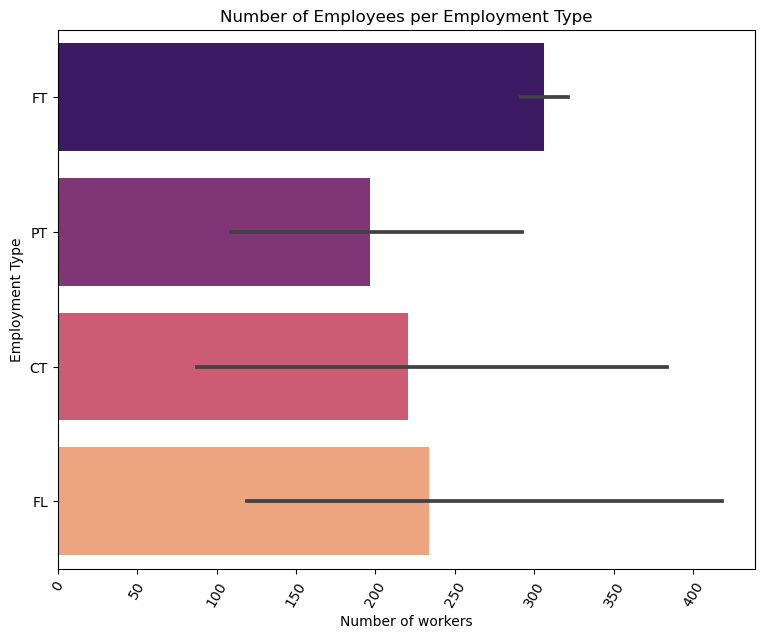

In [135]:
#employment_type
plt.figure(figsize=(9,7))
order = df.groupby('employment_type').size().sort_values(ascending=False).index
ax = sns.barplot(x=df.index.values, y=df['employment_type'], data=df, palette='magma', order=order)
plt.xlabel('Number of workers')
plt.ylabel('Employment Type')
plt.title('Number of Employees per Employment Type')
plt.xticks(rotation=60)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

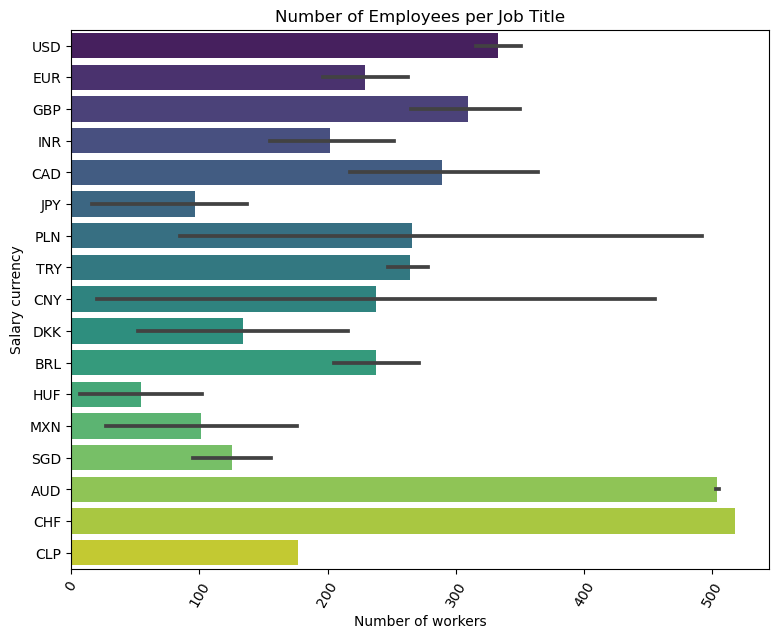

In [137]:
# salary_currency
plt.figure(figsize=(9,7))
order = df.groupby('salary_currency').size().sort_values(ascending=False).index
ax = sns.barplot(x=df.index.values, y=df['salary_currency'], data=df, palette='viridis', order=order)
plt.xlabel('Number of workers')
plt.ylabel('Salary currency')
plt.title('Number of Employees per Job Title')
plt.xticks(rotation=60)

(array([0, 1, 2]), [Text(0, 0, '100'), Text(1, 0, '0'), Text(2, 0, '50')])

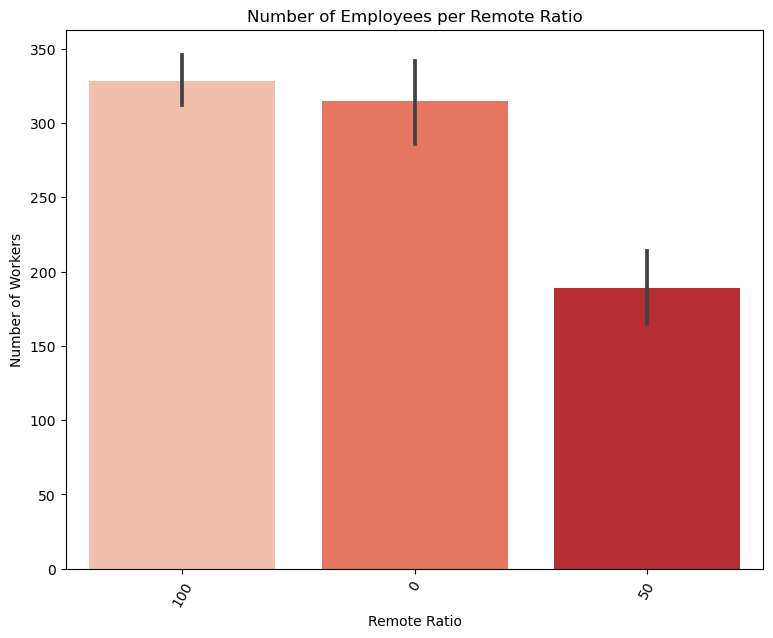

In [146]:
# remote_ratio
plt.figure(figsize=(9, 7))
ax = sns.barplot(x='remote_ratio', y=df.index.values, data=df, palette='Reds', order=order)
plt.xlabel('Remote Ratio')
plt.ylabel('Number of Workers')
plt.title('Number of Employees per Remote Ratio')
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'IN'),
  Text(3, 0, 'CA'),
  Text(4, 0, 'DE'),
  Text(5, 0, 'FR'),
  Text(6, 0, 'ES'),
  Text(7, 0, 'GR'),
  Text(8, 0, 'JP'),
  Text(9, 0, 'PK'),
  Text(10, 0, 'BR'),
  Text(11, 0, 'PT'),
  Text(12, 0, 'NL'),
  Text(13, 0, 'IT'),
  Text(14, 0, 'PL'),
  Text(15, 0, 'RU'),
  Text(16, 0, 'TR'),
  Text(17, 0, 'AE'),
  Text(18, 0, 'VN'),
  Text(19, 0, 'AT'),
  Text(20, 0, 'AU'),
  Text(21, 0, 'BE'),
  Text(22, 0, 'SI'),
  Text(23, 0, 'MX'),
  Text(24, 0, 'RO'),
  Text(25, 0, 'SG'),
  Text(26, 0, 'NG'),
  Text(27, 0, 'HU'),
  Text(28, 0, 'DK'),
  Text(29, 0, 'TN'),
  Text(30, 0, 'CL'),
  Text(31, 0, 'RS'),
  Text(32, 0, 'UA'),
  Text(33, 0, 'BG'),
  Text(34, 0, 'PR'),
  Text(35, 0,

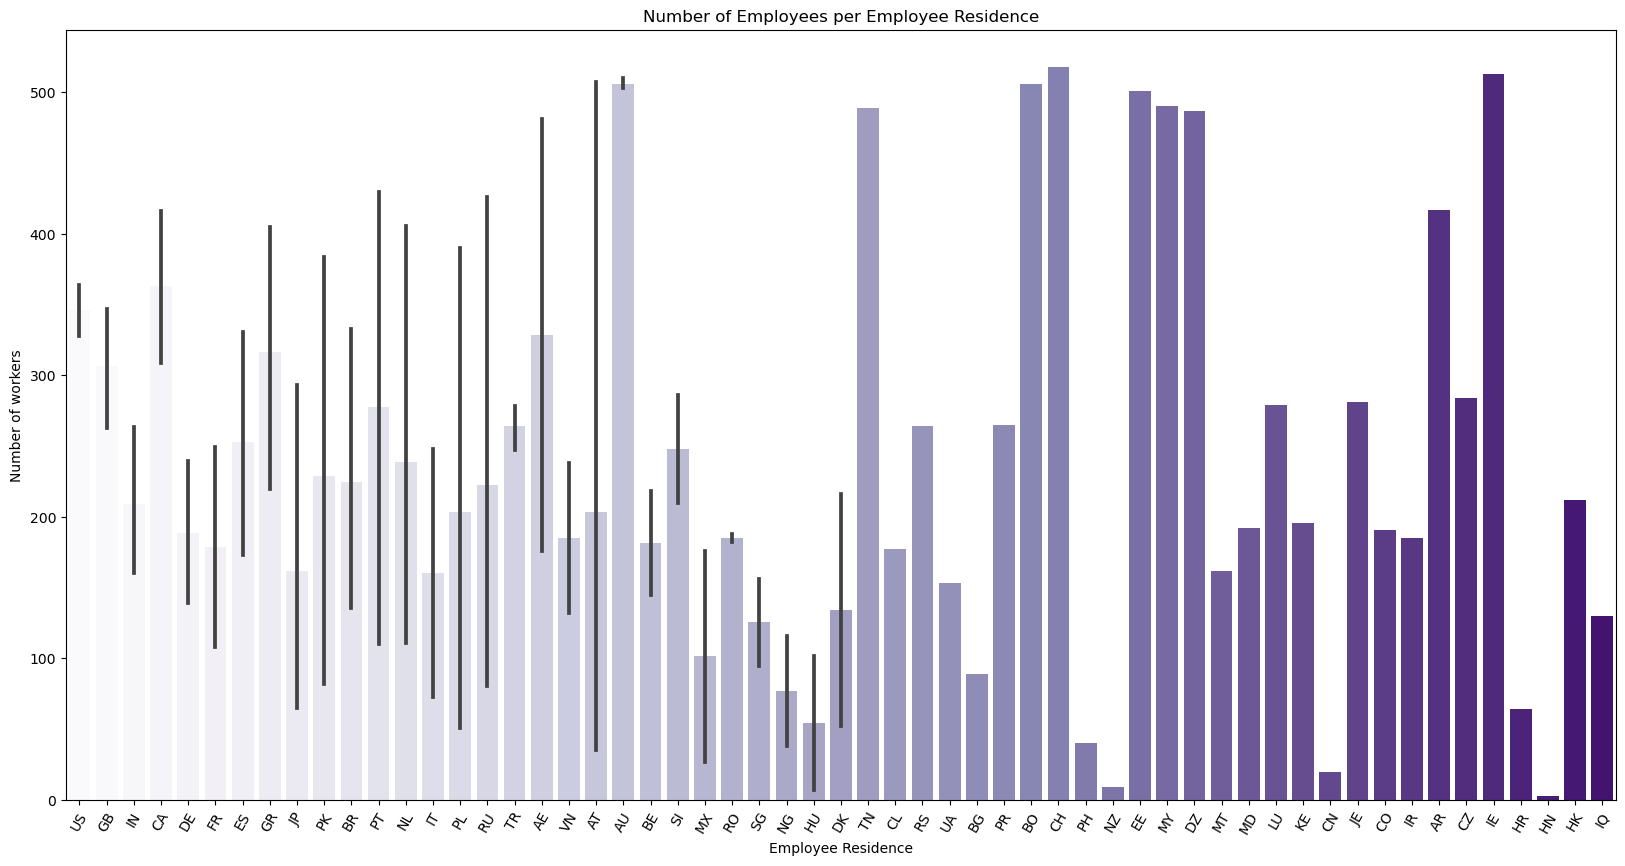

In [150]:
#employee_residence
plt.figure(figsize=(20,10))
order = df.groupby('employee_residence').size().sort_values(ascending=False).index
ax = sns.barplot(x=df['employee_residence'], y=df.index.values, data=df, palette='Purples', order=order)
plt.xlabel('Employee Residence')
plt.ylabel('Number of workers')
plt.title('Number of Employees per Employee Residence')
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'DE'),
  Text(4, 0, 'IN'),
  Text(5, 0, 'FR'),
  Text(6, 0, 'ES'),
  Text(7, 0, 'GR'),
  Text(8, 0, 'JP'),
  Text(9, 0, 'PL'),
  Text(10, 0, 'PT'),
  Text(11, 0, 'NL'),
  Text(12, 0, 'AT'),
  Text(13, 0, 'MX'),
  Text(14, 0, 'LU'),
  Text(15, 0, 'TR'),
  Text(16, 0, 'PK'),
  Text(17, 0, 'AE'),
  Text(18, 0, 'AU'),
  Text(19, 0, 'BR'),
  Text(20, 0, 'DK'),
  Text(21, 0, 'CN'),
  Text(22, 0, 'CZ'),
  Text(23, 0, 'BE'),
  Text(24, 0, 'SI'),
  Text(25, 0, 'RU'),
  Text(26, 0, 'NG'),
  Text(27, 0, 'IT'),
  Text(28, 0, 'CH'),
  Text(29, 0, 'NZ'),
  Text(30, 0, 'CL'),
  Text(31, 0, 'EE'),
  Text(32, 0, 'SG'),
  Text(33, 0, 'UA'),
  Text(34, 0, 'RO'),
  Text(35, 0, 'CO'),
  Text(36, 0, 'MY'),
  Text(

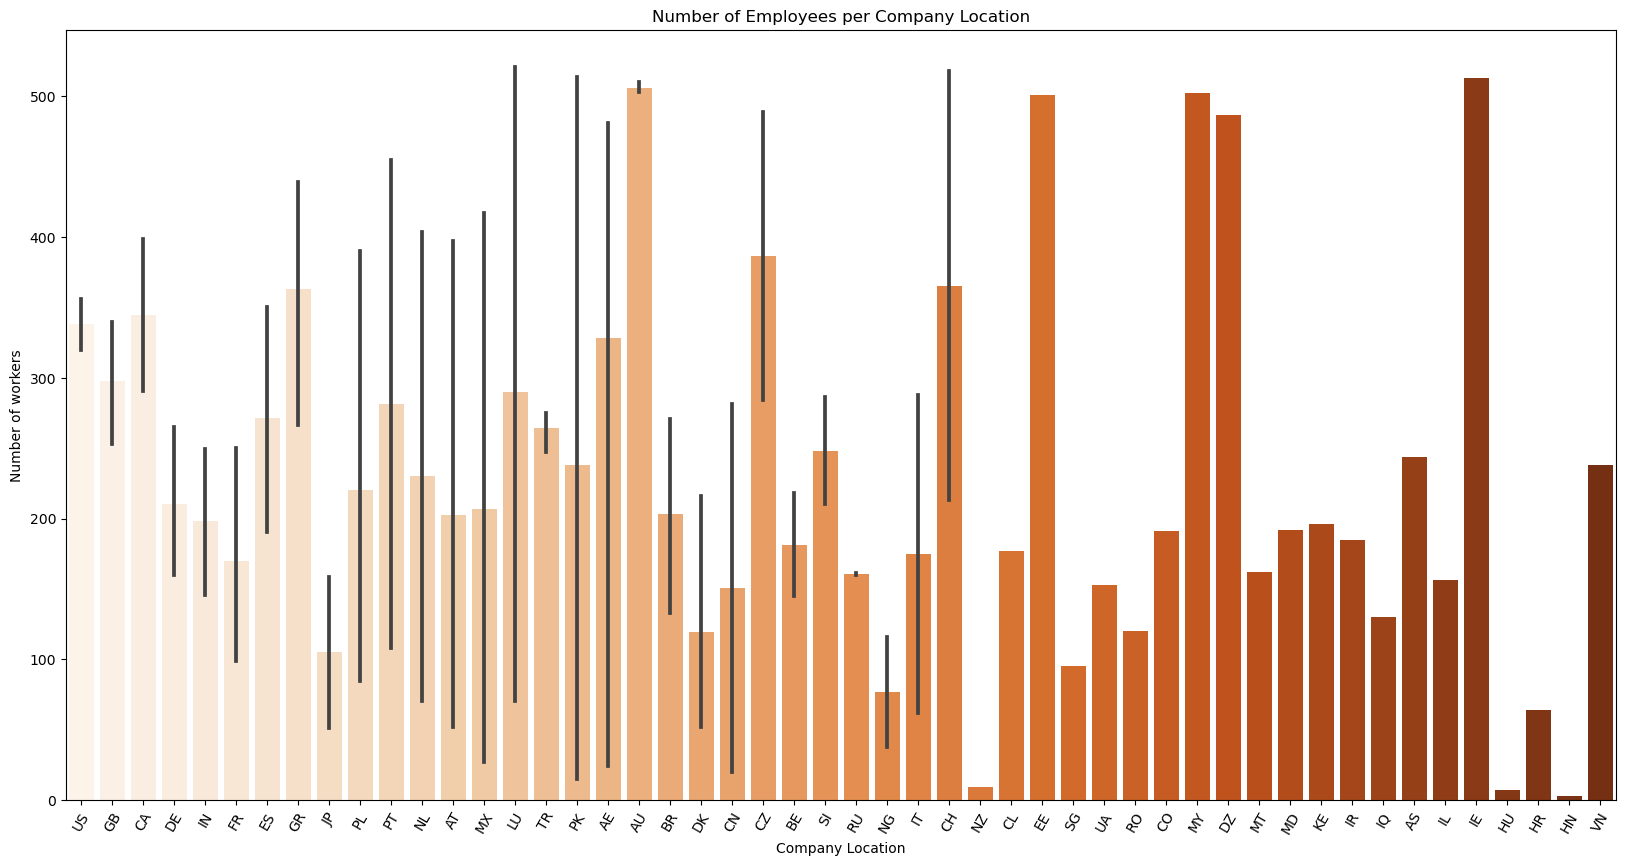

In [151]:
#company_location
plt.figure(figsize=(20,10))
order = df.groupby('company_location').size().sort_values(ascending=False).index
ax = sns.barplot(x=df['company_location'], y=df.index.values, data=df, palette='Oranges', order=order)
plt.xlabel('Company Location')
plt.ylabel('Number of workers')
plt.title('Number of Employees per Company Location')
plt.xticks(rotation=60)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

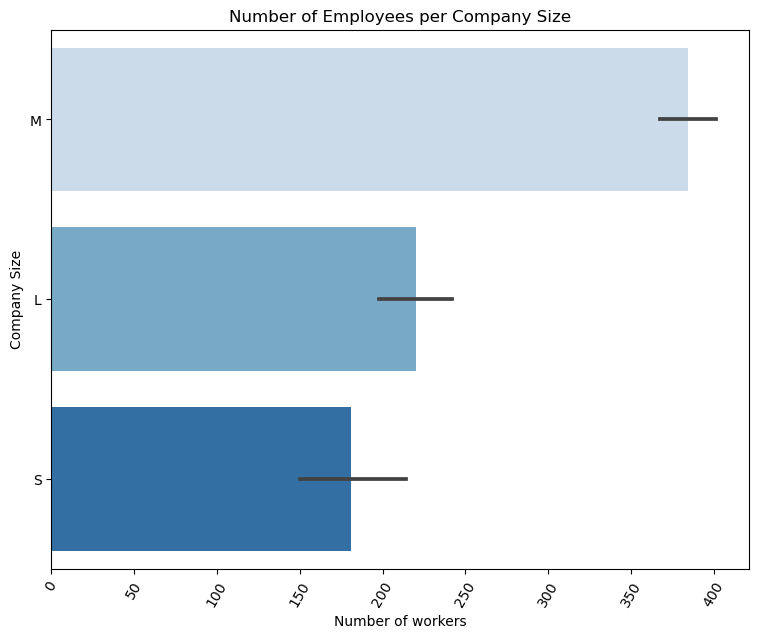

In [152]:
#company_size
plt.figure(figsize=(9,7))
order = df.groupby('company_size').size().sort_values(ascending=False).index
ax = sns.barplot(x=df.index.values, y=df['company_size'], data=df, palette='Blues', order=order)
plt.xlabel('Number of workers')
plt.ylabel('Company Size')
plt.title('Number of Employees per Company Size')
plt.xticks(rotation=60)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

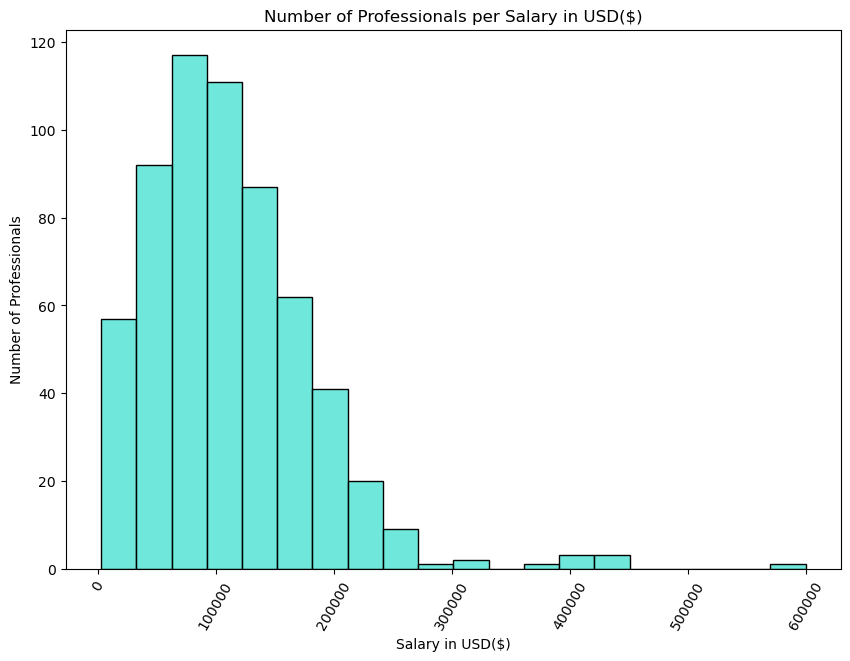

In [107]:
# Bar chart with salary using bins and custom color palette
plt.figure(figsize=(10, 7))
bins = 20
sns.histplot(data=df, x='salary_in_usd', bins=bins, color='turquoise')
plt.xlabel('Salary in USD($)')
plt.ylabel('Number of Professionals')
plt.title('Number of Professionals per Salary in USD($)')
plt.xticks(rotation=60)

### Box Plot

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning'),
  Text(2, 0, 'Data Lead'),
  Text(3, 0, 'Data Analyst'),
  Text(4, 0, 'Data Engineer'),
  Text(5, 0, 'Data Head or Director'),
  Text(6, 0, 'Researcher')])

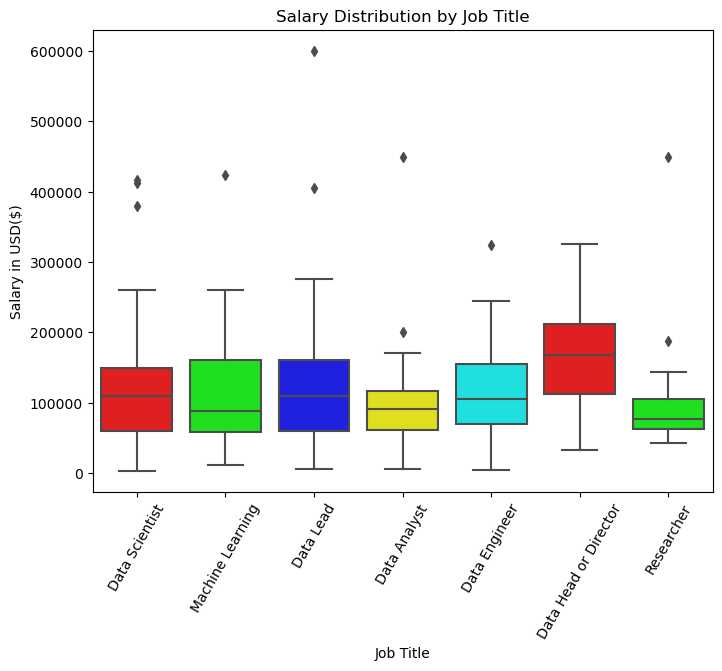

In [113]:
#Salary distrib by job type
# Generate a custom color palette
num_categories = len(df['cluster_job_title'].unique())
custom_palette = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"]

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='cluster_job_title', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Job Title')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Job Title')
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'EUR'),
  Text(1, 0, 'USD'),
  Text(2, 0, 'GBP'),
  Text(3, 0, 'HUF'),
  Text(4, 0, 'INR'),
  Text(5, 0, 'JPY'),
  Text(6, 0, 'CNY'),
  Text(7, 0, 'MXN'),
  Text(8, 0, 'CAD'),
  Text(9, 0, 'DKK'),
  Text(10, 0, 'PLN'),
  Text(11, 0, 'SGD'),
  Text(12, 0, 'CLP'),
  Text(13, 0, 'BRL'),
  Text(14, 0, 'TRY'),
  Text(15, 0, 'AUD'),
  Text(16, 0, 'CHF')])

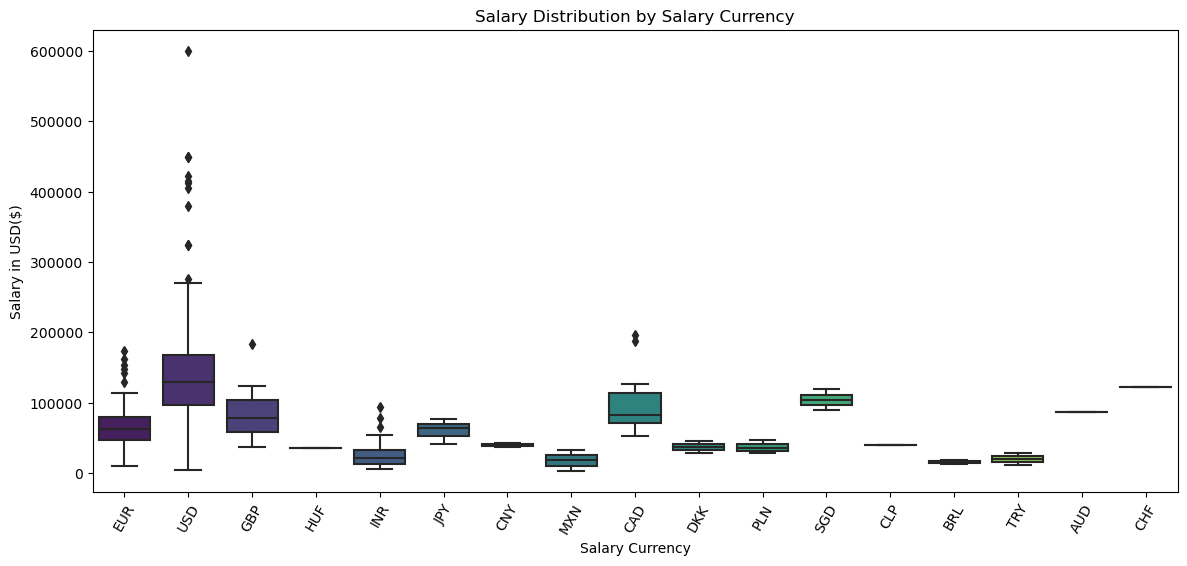

In [120]:
# company size
# Generate a custom color palette
num_categories = len(df['salary_currency'].unique())
custom_palette = sns.color_palette('viridis', num_categories)

# Create a boxplot with the custom color palette
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='salary_currency', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Salary Currency')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Salary Currency')
plt.xticks(rotation=60)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'FT'), Text(1, 0, 'CT'), Text(2, 0, 'PT'), Text(3, 0, 'FL')])

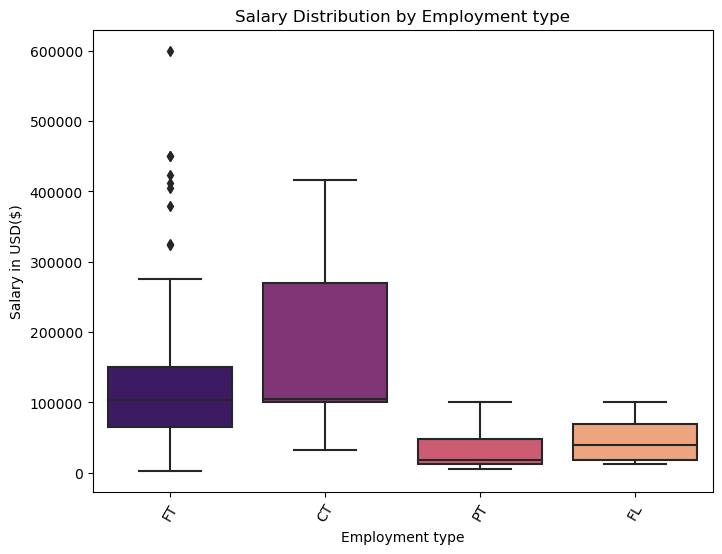

In [122]:
# Employment type
# Generate a custom color palette
num_categories = len(df['employment_type'].unique())
custom_palette = sns.color_palette('magma', num_categories)

# Create a boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Employment type')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Employment type')
plt.xticks(rotation=60)

(array([0, 1, 2]), [Text(0, 0, 'L'), Text(1, 0, 'S'), Text(2, 0, 'M')])

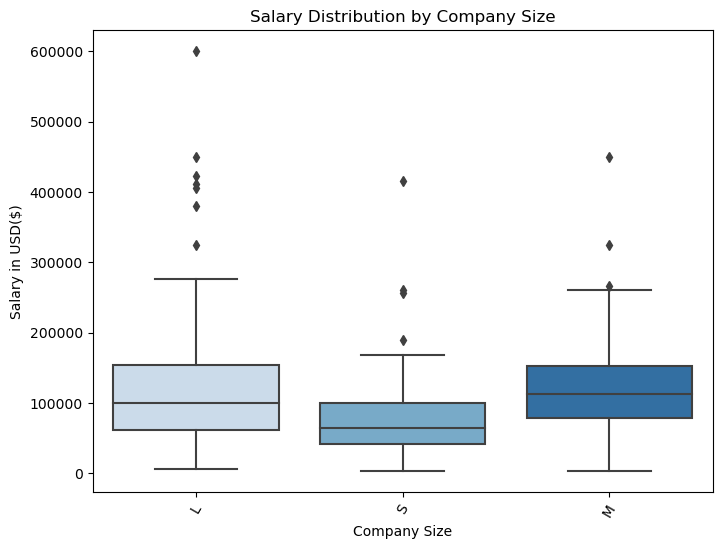

In [124]:
# company size
# Generate a custom color palette
num_categories = len(df['company_size'].unique())
custom_palette = sns.color_palette('Blues', num_categories)

# Create a boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Company Size')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Company Size')
plt.xticks(rotation=60)

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '50'), Text(2, 0, '100')])

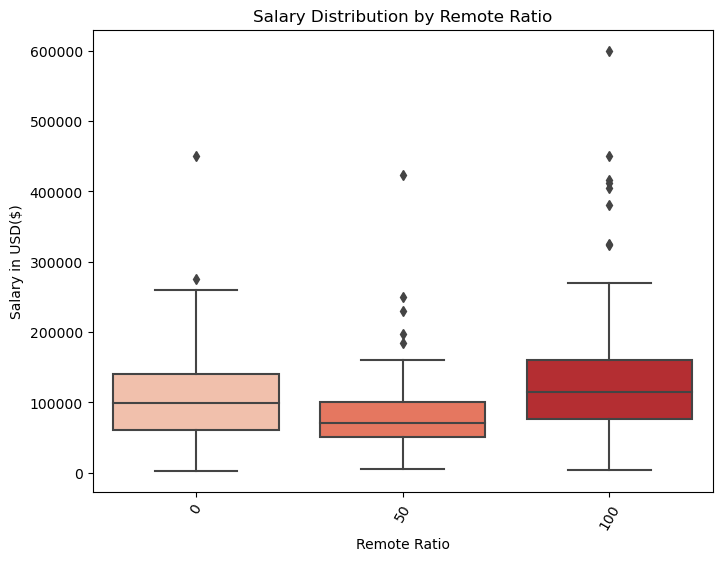

In [126]:
# remote_ratio
# Generate a custom color palette
num_categories = len(df['remote_ratio'].unique())
custom_palette = sns.color_palette('Reds', num_categories)

# Create a boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', palette=custom_palette)
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD($)')
plt.title('Salary Distribution by Remote Ratio')
plt.xticks(rotation=60)

### Scatter Plot

In [ ]:
# salary

In [ ]:
# salary in USD

### Pie Chart

In [ ]:
# Pie chart with the experience level

In [ ]:
# Pie chart with the employment type

In [ ]:
#Pie chart of remote ration

In [ ]:
#Pie chart of the company size

In [ ]:
#Comapny location

### Heatmap

In [ ]:
# Correlation Matrix of all of the variables

### Stacked Bar Chart

In [ ]:
# employment type vs. company size

In [ ]:
# employment type vs. employment level

### Pair Plot 

In [ ]:
# Pair plot of all ofthe variables

### Geographic Map

In [ ]:
#Map plot that shows how many employees per country